# Survival Analysis Lab

Complete the following exercises to solidify your knowledge of survival analysis.

In [1]:
import pandas as pd
import plotly.plotly as py
import cufflinks as cf
from lifelines import KaplanMeierFitter
%matplotlib inline
import matplotlib.pyplot as plt

cf.go_offline()

In [2]:
data = pd.read_csv('../data/attrition.csv')
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## 1. Generate and plot a survival function that shows how employee retention rates vary by gender and employee age.

*Tip: If your lines have gaps in them, you can fill them in by using the `fillna(method=ffill)` and the `fillna(method=bfill)` methods and then taking the average. We have provided you with a revised survival function below that you can use for the exercises in this lab*

In [5]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [6]:
rates = survival(data, 'Gender', 'Age', 'Attrition')

rates.iplot(kind='line', xTitle='Employee Age', yTitle='Attrition',
            title='Retention Rates by Age and Gender')

## 2. Compare the plot above with one that plots employee retention rates by gender over the number of years the employee has been working for the company.

In [7]:
rates2 = survival(data, 'Gender', 'YearsAtCompany', 'Attrition')

rates2.iplot(kind='line', xTitle='Years At Company', yTitle='Retention Rate',
            title='Retention Rates by Years At Company and Gender')

### Commentaire : 
à faire

## 3. Let's look at retention rate by gender from a third perspective - the number of years since the employee's last promotion. Generate and plot a survival curve showing this.

In [8]:
rates3 = survival(data, 'Gender', 'YearsSinceLastPromotion', 'Attrition')

rates3.iplot(kind='line', xTitle='Years Since Last Promotion', yTitle='Retention Rate',
            title='Retention Rates by Years Since Last Promotion and Gender')

## 4. Let's switch to looking at retention rates from another demographic perspective: marital status. Generate and plot survival curves for the different marital statuses by number of years at the company.

In [9]:
rates4 = survival(data, 'MaritalStatus', 'YearsAtCompany', 'Attrition')

rates4.iplot(kind='line', xTitle='Years At Company', yTitle='Retention Rate',
            title='Retention Rates by Years At Company and Marital Status')

## 5. Let's also look at the marital status curves by employee age. Generate and plot the survival curves showing retention rates by marital status and age.

In [10]:
rates5 = survival(data, 'MaritalStatus', 'Age', 'Attrition')

rates5.iplot(kind='line', xTitle='Age', yTitle='Retention Rate',
            title='Retention Rates by Age and Marital Status')

## 6. Now that we have looked at the retention rates by gender and marital status individually, let's look at them together. 

Create a new field in the data set that concatenates marital status and gender, and then generate and plot a survival curve that shows the retention by this new field over the age of the employee.

In [11]:
data['MaritalGender']=data['MaritalStatus']+' '+ data['Gender']

rates6 = survival(data, 'MaritalGender', 'Age', 'Attrition')

rates6.iplot(kind='line', xTitle='Age', yTitle='Retention Rate',
            title='Retention Rates by Age and Marital/Gender')

## 6. Let's find out how job satisfaction affects retention rates. Generate and plot survival curves for each level of job satisfaction by number of years at the company.

In [12]:
rates6b = survival(data, 'JobSatisfaction', 'YearsAtCompany', 'Attrition')

rates6b.iplot(kind='line', xTitle='YearsAtCompany', yTitle='Retention Rate',
            title='Retention Rates by Job Satisfaction and Years At Company')

## 7. Let's investigate whether the department the employee works in has an impact on how long they stay with the company. Generate and plot survival curves showing retention by department and years the employee has worked at the company.

In [13]:
rates7 = survival(data, 'Department', 'YearsAtCompany', 'Attrition')

rates7.iplot(kind='line', xTitle='Years At Company', yTitle='Retention Rate',
            title='Retention Rates by Age and Years At Company')

## 8. From the previous example, it looks like the sales department has the highest attrition. Let's drill down on this and look at what the survival curves for specific job roles within that department look like.

Filter the data set for just the sales department and then generate and plot survival curves by job role and the number of years at the company.

In [14]:
data_sales = data.loc[data['Department']=='Sales']
rates8 = survival(data_sales, 'JobRole', 'YearsAtCompany', 'Attrition')

rates8.iplot(kind='line', xTitle='Years At Company', yTitle='Retention Rate',
            title='Retention Rates by Job Role and Years At Company')

## 9. Let examine how compensation affects attrition.

- Use the `pd.qcut` method to bin the HourlyRate field into 5 different pay grade categories (Very Low, Low, Moderate, High, and Very High).
- Generate and plot survival curves showing employee retention by pay grade and age.

(<matplotlib.axes._subplots.AxesSubplot at 0x1236003c8>, count    1470.000000
 mean       65.891156
 std        20.329428
 min        30.000000
 25%        48.000000
 50%        66.000000
 75%        83.750000
 max       100.000000
 Name: HourlyRate, dtype: float64)

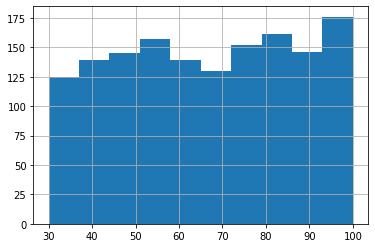

In [15]:
data['HourlyRate'].hist(), data['HourlyRate'].describe()

In [16]:
data['HourlyRateCat'] = pd.cut(x=data['HourlyRate'], bins=[15,35,55,75,95,115], labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
data['HourlyRateCat'].value_counts()

High         431
Moderate     411
Low          406
Very High    115
Very Low     107
Name: HourlyRateCat, dtype: int64

In [17]:
rates9 = survival(data, 'HourlyRateCat', 'Age', 'Attrition')

rates9.iplot(kind='line', xTitle='Age', yTitle='Retention Rate',
            title='Retention Rates by Job Role and Years At Company')

## 10. Finally, let's take a look at how the demands of the job impact employee attrition.

- Create a new field whose values are 'Overtime' or 'Regular Hours' depending on whether there is a Yes or a No in the OverTime field.
- Create a new field that concatenates that field with the BusinessTravel field.
- Generate and plot survival curves showing employee retention based on these conditions and employee age.

In [18]:
import numpy as np
data['OverTimeNum'] = np.where(data['OverTime']=='No','Regular Hours','OverTime',)
data['OverTimeNum'].value_counts()

Regular Hours    1054
OverTime          416
Name: OverTimeNum, dtype: int64

In [20]:
data['BusinessOverTime']=data['OverTimeNum']+'_'+data['BusinessTravel']
data['BusinessOverTime'].value_counts()

Regular Hours_Travel_Rarely        748
OverTime_Travel_Rarely             295
Regular Hours_Travel_Frequently    191
Regular Hours_Non-Travel           115
OverTime_Travel_Frequently          86
OverTime_Non-Travel                 35
Name: BusinessOverTime, dtype: int64

In [21]:
rates10 = survival(data, 'BusinessOverTime', 'Age', 'Attrition')

rates10.iplot(kind='line', xTitle='Age', yTitle='Business OverTime',
            title='Retention Rates by Business Over Time and Age')